In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, accuracy_score,roc_auc_score
from imblearn.pipeline import Pipeline

In [3]:
#Leer csv
train=pd.read_csv('C:/Users/Santiago Zubieta/Documents/2023-2/statistical/Proyecto/ProyectoSLDA/Classification/Preprocesamiento/sinOutliers.csv')
test=pd.read_csv('test.csv')
print(train.shape,test.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Santiago Zubieta/Documents/2023-2/statistical/Proyecto/ProyectoSLDA/Classification/Preprocesamiento/sinOutliers.csv'

In [4]:
#Variables
X=train.iloc[:,2:]
y=train.iloc[:,1]
X=X.loc[:,[False, False, False, False,  True,  True, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True]]
       
X.head()

,B21,B22,B24,B45,B46,B47,B54,B67,B68,B85
0,0.051358,0.054788,0.192552,0.715467,2.514527,0.284533,0.427810,1.491033,1.066784,0.315473
1,0.014865,0.036778,0.066270,0.445023,0.801876,0.554977,0.116977,5.559600,2.474149,0.000781
2,0.034651,0.035834,0.060801,0.410631,0.696731,0.589369,0.061781,2.518440,1.034150,0.423366
3,0.011525,0.032684,0.055938,0.415716,0.711496,0.584284,0.534784,6.821618,2.835855,0.116712
4,-0.471426,-0.879894,-1.330865,0.338856,0.512529,0.661144,0.010106,5.508104,1.866452,-0.109884


In [5]:
Xtrain,Xtest,yTrain,yTest=train_test_split(X,y,test_size=0.20,random_state=42)
(Xtrain.shape,yTest.shape)


((1438, 10), (360,))

In [6]:
rf=RandomForestClassifier()
smote=SMOTE()

In [7]:
# Define the parameter grid for the grid search
param_grid = {
    'rf__n_estimators': [ 50,100, 200, 400,500],
    'rf__max_depth': [3,4, 5],
    'smote__sampling_strategy': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
}

# Create a pipeline with SMOTE and Random Forest
pipeline = Pipeline([
    ('smote', smote),
    ('rf', rf)
])

# Define the scoring metric as AUC
scorer = make_scorer(accuracy_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=3)


In [77]:
np.linspace(0.01, 1, 7)

array([0.01 , 0.175, 0.34 , 0.505, 0.67 , 0.835, 1.   ])

(1798, 19)

In [8]:

grid_search.fit(X,y)

# Get the best parameters and model 
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

c:\Users\Santiago Zubieta\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Santiago Zubieta\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Santiago Zubieta\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Santiago Zubieta\AppData\Local\P

In [9]:
best_params

{'rf__max_depth': 4, 'rf__n_estimators': 50, 'smote__sampling_strategy': 0.1}

In [ ]:
rf2=RandomForestClassifier(n_estimators=100,max_depth=3)

In [136]:
xTest.shape


(545, 39)

In [132]:
varBasuras=['B11','B13','B14','B21','B23','B24','B46','B48',
            'B51','B52','B53','B54','B61','B62','B63','B64',
            'B65','B66','B67','B611','B85']
X=train.drop(columns=varBasuras)
X=X.iloc[:,2:]
X.columns

xTest=test.iloc[:,2:]
xTest.columns
#test=test.drop

Index(['B12', 'B13', 'B14', 'B21', 'B22', 'B23', 'B24', 'B31', 'B32', 'B41',
       'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B51', 'B52', 'B53',
       'B54', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69',
       'B610', 'B611', 'B612', 'B613', 'B81', 'B82', 'B83', 'B84', 'B85'],
      dtype='object')

In [12]:
xTest=test.loc[:,X.columns]



In [14]:
print(xTest.head())

        B21       B22       B24       B45       B46       B47       B54  \
0  0.004660  0.015889  0.019988  0.205074  0.257978  0.794926  0.033685   
1  0.019770  0.026808  0.028787  0.068754  0.073830  0.931246  0.026127   
2  0.035654  0.066402  0.123366  0.461747  0.857861  0.538253  0.198909   
3  0.047037  0.047704  0.089339  0.466033  0.872775  0.533967  0.023921   
4  0.066137  0.126616  0.249419  0.492356  0.969884  0.507644  0.127201   

         B67       B68       B85  
0  16.626055  3.409565  1.682761  
1  19.722161  1.355979  1.501305  
2   4.033451  1.862432  0.603646  
3   2.176174  1.014169  1.107632  
4   3.888342  1.914449  0.107180  


In [134]:
xTest.columns

Index(['B12', 'B13', 'B14', 'B21', 'B22', 'B23', 'B24', 'B31', 'B32', 'B41',
       'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B51', 'B52', 'B53',
       'B54', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69',
       'B610', 'B611', 'B612', 'B613', 'B81', 'B82', 'B83', 'B84', 'B85'],
      dtype='object')

In [144]:
xTest=test[X.columns]

In [15]:
# Assuming best_model is your trained RandomForestClassifier
probabilities = best_model.predict_proba(xTest)[:,1]
# Convert the NumPy array to a pandas DataFrame
probabilities_df = pd.DataFrame(probabilities)
probabilities_df.index = probabilities_df.index + 1
# Save the DataFrame to a CSV file
probabilities_df.to_csv('intento.csv', index=True)

(array([351.,  60.,  45.,  19.,  14.,  13.,   8.,   6.,   4.,   3.,   3.,
          6.,   0.,   2.,   2.,   4.,   0.,   0.,   1.,   2.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.02070535, 0.05037423, 0.0800431 , 0.10971198, 0.13938086,
        0.16904974, 0.19871862, 0.2283875 , 0.25805638, 0.28772526,
        0.31739414, 0.34706302, 0.3767319 , 0.40640078, 0.43606966,
        0.46573854, 0.49540742, 0.5250763 , 0.55474518, 0.58441406,
        0.61408294, 0.64375182, 0.67342069, 0.70308957, 0.73275845,
        0.76242733, 0.79209621, 0.82176509, 0.85143397, 0.88110285,
        0.91077173]),
 <BarContainer object of 30 artists>)

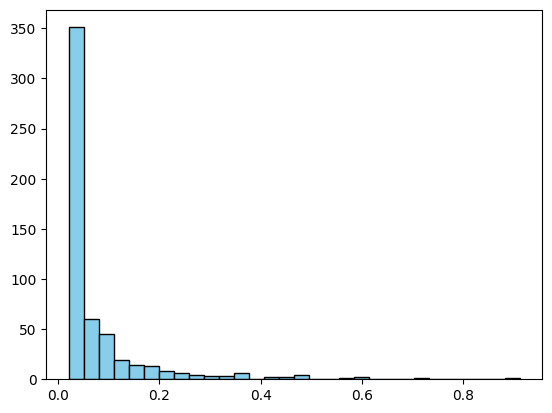

In [150]:
import matplotlib.pyplot as plt
plt.hist(probabilities, bins=30, color='skyblue', edgecolor='black')

In [151]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Get the names of the features (assuming X_train is a DataFrame)
feature_names = Xtrain.columns

# Create a bar plot of feature importances
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')

plt.show()

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'